In [12]:
%matplotlib inline

In [499]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.xarray

sns.set(style='ticks', context='paper', palette='colorblind',font_scale=1.3)
mpl.rc('figure', dpi=100, figsize=[11, 5])
mpl.rc('savefig', dpi=500, bbox='tight')
mpl.rc('legend', frameon=False)

import warnings

warnings.simplefilter('ignore')

In [180]:
dat = xr.open_mfdataset('combinations_lt_10_*.nc',concat_dim='clusters',)

In [567]:
dat['vortpos'] = np.abs( dat.vort.where(dat.vort>0) )
dat['vortneg'] = np.abs( dat.vort.where(dat.vort<0) )

dat['divpos'] = np.abs( dat.div.where(dat.div>0) )
dat['divneg'] = np.abs( dat.div.where(dat.div<0) )

dat['absstrain'] = np.abs( dat.strain )

In [632]:
counted = dat.groupby_bins(dat.length,np.logspace(-1,2,50)).count()

In [633]:
counted.vortpos

<xarray.DataArray 'vortpos' (length_bins: 49)>
dask.array<shape=(49,), dtype=float64, chunksize=(23,)>
Coordinates:
  * length_bins  (length_bins) object (0.1, 0.115] ... (86.851, 100.0]

In [602]:
grouped = dat.groupby_bins(dat.length,np.logspace(-1,2,50)).mean()
grouped_aspect = dat.groupby_bins(dat.aspect,np.logspace(-2,0,20)).mean()

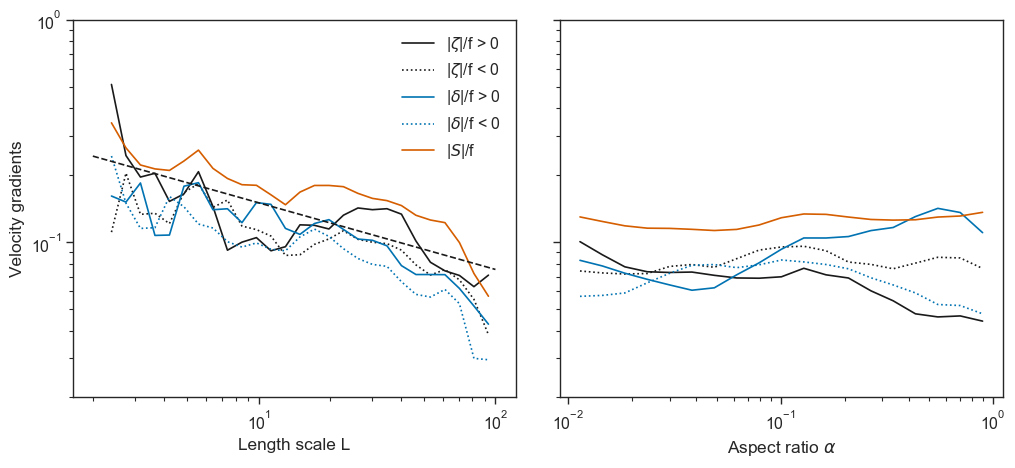

In [630]:
f,ax = plt.subplots(1,2,figsize=(12,5), sharey=True)
grouped.vortpos.plot(label=r'|$\zeta$|/f > 0',ax=ax[0],color='k')
grouped.vortneg.plot(label=r'|$\zeta$|/f < 0',ax=ax[0],color='k',ls='dotted')

grouped.divpos.plot(label=r'|$\delta$|/f > 0',ax=ax[0],color='b')
grouped.divneg.plot(label=r'|$\delta$|/f < 0',ax=ax[0],color='b',ls='dotted')

grouped.absstrain.plot(label=r'|$S$|/f',ax=ax[0], color='r')

x = np.logspace(0.3,2,2)
ax[0].plot(x,0.3*x**-0.3,color='k',ls='dashed')

ax[0].set_ylim(2e-2,1e0)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].legend()
ax[0].set_xlabel('Length scale L')
ax[0].set_ylabel('Velocity gradients')

grouped_aspect.vortpos.plot(label=r'|$\zeta$|/f > 0',ax=ax[1],color='k')
grouped_aspect.vortneg.plot(label=r'|$\zeta$|/f < 0',ax=ax[1],color='k', ls='dotted')

grouped_aspect.divpos.plot(label=r'|$\delta$|/f > 0',ax=ax[1],color='b')
grouped_aspect.divneg.plot(label=r'|$\delta$|/f < 0',ax=ax[1],color='b',ls='dotted')

grouped_aspect.absstrain.plot(label=r'|$S$|/f',ax=ax[1], color='r')

# ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_ylabel(None)
ax[1].set_xlabel(r'Aspect ratio $\alpha$')

plt.subplots_adjust(wspace=0.1)

plt.savefig('length_scale.pdf')